# <code style="background:white;color:#3EA99F">                        ASSIGNMENT-1
# <code style="background:white;color:#00B5E2">            ANIKET SINGH  21070126013   AIML-A1
### <code style="background:white;color:#00B5E2">   Git Hub Repository:https://github.com/AniketSingh1m/NLP/tree/main/Assignment_1   

In [1]:
# Importing the libraries for dataset manipulation operations
import pandas as pd

# <code style="background:white;color:#E2522F">Mouting drive:

In [3]:
# Mounting drive to google collab to access dataset
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# <code style="background:white;color:#E2522F">Importing Dataset:

In [4]:
# Importing the dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NLP_LAB/Dataset_Ass_1/Reviews.csv',encoding='latin-1')
dataset = pd.DataFrame(dataset)
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# <code style="background:white;color:#E2522F">Selecting Required Columns:

In [5]:
# Reviewing column names and finding important one for NLP
dataset.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
#Taking only useful column for consideration
columns=['Id','Score','Summary','Text']
dataset = pd.DataFrame(dataset[columns])
dataset.head()

,Id,Score,Summary,Text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,5,Great taffy,Great taffy at a great price. There was a wid...


# <code style="background:white;color:#E2522F">Importing NLTK Library for Preprocessing:

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [8]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# <code style="background:white;color:#E2522F">As Dataset is too big randomly selecting part of dataset:

In [9]:
import random

# Specify the number of rows you want to randomly select
num_rows_to_select = 30000

# Get the total number of rows in the DataFrame
total_rows = len(dataset)

# Generate a list of random indices within the range of total rows
random_indices = random.sample(range(total_rows), num_rows_to_select)

# Select the rows based on the random indices
random_rows = dataset.iloc[random_indices]

# Create a new DataFrame from the randomly selected rows
dataset = pd.DataFrame(random_rows)

# <code style="background:white;color:#E2522F">Tokenization & Lemmatization Operations:
# <code style="background:white;color:#E2522F">Data Cleansing: Remove stopwords, remove symbols, remove urls:

In [10]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

dataset['CleanedText'] = dataset['Text'].apply(preprocess_text)

In [11]:
dataset.shape

(30000, 5)

# <code style="background:white;color:#E2522F"> Using countvectorizer to convert text to vectors:

In [12]:
# Using countvectorizer to convert text to vectors
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the text column
count_vectors = count_vectorizer.fit_transform(dataset['CleanedText'] )


# Print the shape and a small sample of the output
print("Shape of CountVectorizer output:", count_vectors.shape)
print("Sample of CountVectorizer output:\n", count_vectors[0:2])

Shape of CountVectorizer output: (30000, 28220)
Sample of CountVectorizer output:
   (0, 10590)	1
  (0, 19262)	1
  (0, 14764)	1
  (0, 24951)	1
  (0, 15780)	2
  (0, 25962)	1
  (0, 19344)	5
  (0, 4794)	5
  (0, 9563)	4
  (0, 6840)	1
  (0, 9750)	1
  (0, 26239)	1
  (0, 7142)	1
  (0, 18451)	2
  (0, 840)	3
  (0, 27277)	3
  (0, 27758)	2
  (0, 22069)	1
  (0, 20396)	1
  (0, 17297)	1
  (0, 10337)	1
  (0, 7584)	1
  (0, 15399)	1
  (0, 27794)	1
  (0, 6332)	1
  :	:
  (1, 17654)	1
  (1, 9304)	1
  (1, 11010)	1
  (1, 4345)	1
  (1, 24241)	1
  (1, 3848)	1
  (1, 16385)	2
  (1, 19021)	1
  (1, 2499)	1
  (1, 25535)	1
  (1, 4793)	1
  (1, 11819)	1
  (1, 23788)	1
  (1, 7779)	1
  (1, 23764)	1
  (1, 24852)	1
  (1, 7937)	1
  (1, 14815)	1
  (1, 22017)	1
  (1, 18747)	1
  (1, 24726)	1
  (1, 3847)	1
  (1, 15169)	1
  (1, 23768)	1
  (1, 17174)	1


# <code style="background:white;color:#E2522F"> Using TF-IDF to convert text to vectors:

In [14]:
# Using TF-IDF to convert text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text column
tfidf_vectors = tfidf_vectorizer.fit_transform(dataset['CleanedText'] )

# Print the shape and a small sample of the output
print("Shape of TFIDFVectorizer output:", tfidf_vectors.shape)
print("Sample of TFIDFVectorizer output:\n", tfidf_vectors[0:2])

Shape of TFIDFVectorizer output: (30000, 28220)
Sample of TFIDFVectorizer output:
   (0, 22016)	0.07054432640882344
  (0, 3325)	0.03850503921696987
  (0, 24264)	0.07833526698229168
  (0, 27144)	0.04632259723550692
  (0, 6332)	0.11356567782712278
  (0, 27794)	0.11106459131821053
  (0, 15399)	0.10492654365759971
  (0, 7584)	0.07367035011215385
  (0, 10337)	0.034595596461899775
  (0, 17297)	0.04573936085009291
  (0, 20396)	0.08873275345129461
  (0, 22069)	0.08342990289335664
  (0, 27758)	0.14031096253987183
  (0, 27277)	0.21479078465166754
  (0, 840)	0.11437460901561385
  (0, 18451)	0.14612986620687807
  (0, 7142)	0.10083218853447448
  (0, 26239)	0.06549075688095363
  (0, 9750)	0.1323119510523854
  (0, 6840)	0.04850855082399404
  (0, 9563)	0.5292478042095417
  (0, 4794)	0.6615597552619271
  (0, 19344)	0.15607655574292228
  (0, 25962)	0.04502262812028121
  (0, 15780)	0.1500800995078035
  :	:
  (1, 22207)	0.15667362240942606
  (1, 25104)	0.05589504703783598
  (1, 8172)	0.07978770385851389
 

# <code style="background:white;color:#E2522F"> Using word2vec to convert text to vectors:

In [15]:
# Using word2vec to convert text to vectors
from gensim.models import Word2Vec

# Tokenize the text column
tokenized_text = dataset['CleanedText'].apply(lambda x: x.split())

# Train a Word2Vec model
word2vec_model = Word2Vec(tokenized_text, window=5, min_count=1, workers=4)
word2vec_model.train(tokenized_text, total_examples=len(tokenized_text), epochs=10)

# Create Word2Vec vectors for the text column
word2vec_vectors = tokenized_text.apply(lambda x: [word2vec_model.wv[word] for word in x])

# Print the shape and a small sample of the output
print("Sample of Word2Vec output:", word2vec_vectors.head())


Sample of Word2Vec output: 127239    [[-0.11511172, -0.6120818, -0.28831002, 1.0117...
6577      [[0.7014204, 0.015248791, 0.012417167, 0.05614...
340362    [[0.0147908935, 0.07576435, 0.35363078, 0.2393...
478524    [[0.04025945, -0.1266721, -0.5802059, 0.064881...
191099    [[1.0440321, 0.9758438, -0.015830606, -1.29096...
Name: CleanedText, dtype: object


# <code style="background:white;color:#E2522F"> Using GoogleNews word2vec to convert text to vectors:

In [16]:
# Using GoogleNews word2vec to convert text to vectors
from gensim.models import KeyedVectors

# Load the GoogleNews Word2Vec model
google_w2v_path = '/content/gdrive/MyDrive/Colab Notebooks/NLP_LAB/Dataset_Ass_1/GoogleNews-vectors-negative300.bin'
google_w2v_model = KeyedVectors.load_word2vec_format(google_w2v_path, binary=True)

# Create GoogleNews Word2Vec vectors for the text column
google_w2v_vectors = tokenized_text.apply(lambda x: [google_w2v_model[word] for word in x if word in google_w2v_model])

# Print the shape and a small sample of the output
print("Sample of GoogleNews Word2Vec output:", google_w2v_vectors.head())

Sample of GoogleNews Word2Vec output: 127239    [[-0.20800781, -0.028198242, 0.021850586, 0.16...
6577      [[0.27148438, 0.20507812, -0.029052734, -0.103...
340362    [[-0.11621094, 0.023925781, 0.0067443848, -0.3...
478524    [[0.040527344, -0.1015625, 0.08154297, -0.0290...
191099    [[0.08203125, -0.06542969, 0.06689453, 0.16894...
Name: CleanedText, dtype: object


In [17]:
#!gunzip "/content/gdrive/MyDrive/Colab Notebooks/NLP_LAB/Dataset_Ass_1/GoogleNews-vectors-negative300.bin.gz"


# <code style="background:white;color:#E2522F"> Unzipping GoogleNews vector model:

In [18]:
from gensim.models import KeyedVectors

google_w2v_model_path = '/content/gdrive/MyDrive/Colab Notebooks/NLP_LAB/Dataset_Ass_1/GoogleNews-vectors-negative300.bin'
google_w2v_model = KeyedVectors.load_word2vec_format(google_w2v_model_path, binary=True)


# <code style="background:white;color:#E2522F"> Applying different models: 

# <code style="background:white;color:#E2522F"> Logistic Regression with CountVectorizer:

In [19]:
# Logistic Regression with CountVectorizer

# Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(count_vectors, dataset['Score'], test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lr_model_count = LogisticRegression(max_iter=1000)
lr_model_count.fit(X_train, y_train)

# Make predictions and print the classification report
y_pred_count = lr_model_count.predict(X_test)
print("Classification Report for Logistic Regression with CountVectorizer:\n", classification_report(y_test, y_pred_count))

Classification Report for Logistic Regression with CountVectorizer:
               precision    recall  f1-score   support

           1       0.55      0.54      0.54       524
           2       0.29      0.24      0.27       313
           3       0.39      0.27      0.32       479
           4       0.35      0.25      0.29       844
           5       0.80      0.89      0.84      3840

    accuracy                           0.69      6000
   macro avg       0.48      0.44      0.45      6000
weighted avg       0.65      0.69      0.67      6000



# <code style="background:white;color:#E2522F"> Logistic Regression with TFIDFVectorizer:

In [20]:
# Logistic Regression with TFIDFVectorizer
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, dataset['Score'], test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lr_model_tfidf = LogisticRegression(max_iter=1000)
lr_model_tfidf.fit(X_train, y_train)

# Make predictions and print the classification report
y_pred_tfidf = lr_model_tfidf.predict(X_test)
print("Classification Report for Logistic Regression with TFIDFVectorizer:\n", classification_report(y_test, y_pred_tfidf))

Classification Report for Logistic Regression with TFIDFVectorizer:
               precision    recall  f1-score   support

           1       0.60      0.50      0.54       524
           2       0.33      0.06      0.10       313
           3       0.54      0.14      0.22       479
           4       0.42      0.19      0.26       844
           5       0.74      0.97      0.84      3840

    accuracy                           0.70      6000
   macro avg       0.53      0.37      0.39      6000
weighted avg       0.65      0.70      0.64      6000



# <code style="background:white;color:#E2522F"> Logistic Regression with Word2Vec:

In [21]:
# Logistic Regression with Word2Vec
# Importing the libraries
import numpy as np

# Function to calculate the mean vector for each document
def mean_vector(words):
    # Filter out words that are not in the Word2Vec model's vocabulary
    valid_words = [word for word in words if word in word2vec_model.wv]
    if valid_words:
        # Calculate the mean vector for valid words
        vectors = [word2vec_model.wv[word] for word in valid_words]
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector if no valid words are found
        return np.zeros(word2vec_model.vector_size)

In [22]:
# Apply the function to the tokenized text
word2vec_mean_vectors = np.array(tokenized_text.apply(mean_vector).tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(word2vec_mean_vectors, dataset['Score'], test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lr_model_word2vec = LogisticRegression(max_iter=1000)
lr_model_word2vec.fit(X_train, y_train)

# Make predictions and print the classification report
y_pred_word2vec = lr_model_word2vec.predict(X_test)
print("Classification Report for Logistic Regression with Word2Vec:\n", classification_report(y_test, y_pred_word2vec))

Classification Report for Logistic Regression with Word2Vec:
               precision    recall  f1-score   support

           1       0.50      0.52      0.51       524
           2       0.27      0.04      0.08       313
           3       0.34      0.09      0.14       479
           4       0.38      0.11      0.17       844
           5       0.73      0.96      0.83      3840

    accuracy                           0.68      6000
   macro avg       0.44      0.34      0.34      6000
weighted avg       0.60      0.68      0.61      6000



# <code style="background:white;color:#E2522F"> Logistic Regression with Google_w2v_model:

In [23]:
# Function to calculate the mean vector for each document
def mean_vector_google_w2v(words):
    # Filter out words that are not in the GoogleNews Word2Vec model's vocabulary
    valid_words = [word for word in words if word in google_w2v_model]
    if valid_words:
        # Calculate the mean vector for valid words
        vectors = [google_w2v_model[word] for word in valid_words]
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector if no valid words are found
        return np.zeros(google_w2v_model.vector_size)

In [25]:
# Apply the function to the tokenized text
google_w2v_mean_vectors = np.array(tokenized_text.apply(mean_vector_google_w2v).tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(google_w2v_mean_vectors, dataset['Score'], test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lr_model_google_w2v = LogisticRegression(max_iter=1000)
lr_model_google_w2v.fit(X_train, y_train)

# Make predictions and print the classification report
y_pred_google_w2v = lr_model_google_w2v.predict(X_test)
print("Classification Report for Logistic Regression with GoogleNews Word2Vec:\n", classification_report(y_test, y_pred_google_w2v))

Classification Report for Logistic Regression with GoogleNews Word2Vec:
               precision    recall  f1-score   support

           1       0.56      0.51      0.53       524
           2       0.40      0.04      0.08       313
           3       0.29      0.04      0.07       479
           4       0.38      0.10      0.16       844
           5       0.71      0.97      0.82      3840

    accuracy                           0.68      6000
   macro avg       0.47      0.33      0.33      6000
weighted avg       0.60      0.68      0.60      6000



# <code style="background:white;color:#E2522F"> Logistic Regression classification report analysis:
- <b>The models show relatively consistent performance across different vectorization techniques.<br>
- <b>They perform well in terms of weighted average F1-scores, indicating competence in classifying the majority class.<br>
- <b>However, they struggle with minority class classification, as seen from low macro average F1-scores.<br>
- <b>Among the vectorization techniques, TFIDFVectorizer consistently yields the highest macro and weighted average F1-scores.<br>
- <b>The models face challenges in correctly classifying class 2, as evident from consistently low precision, recall, and F1-scores for this class.

# <code style="background:white;color:#E2522F"> SVC with CountVectorizer:

In [26]:
# SGD Classifier & GridSearchCV with CountVectorizer:
# Importing the SGD Classifier
from sklearn.linear_model import SGDClassifier

# Split the data into training and testing sets and training the model
X_train, X_test, y_train, y_test = train_test_split(count_vectors, dataset['Score'], test_size=0.2, random_state=42)
sgd_model_count = SGDClassifier(loss='hinge', max_iter=10000)
sgd_model_count.fit(X_train, y_train)

# Make predictions and printing the classification report
y_pred_count_sgd = sgd_model_count.predict(X_test)
print("Classification Report for SGD Classifier with CountVectorizer:\n", classification_report(y_test, y_pred_count_sgd))

Classification Report for SGD Classifier with CountVectorizer:
               precision    recall  f1-score   support

           1       0.56      0.54      0.55       524
           2       0.27      0.20      0.23       313
           3       0.37      0.21      0.27       479
           4       0.34      0.26      0.30       844
           5       0.79      0.89      0.84      3840

    accuracy                           0.68      6000
   macro avg       0.47      0.42      0.44      6000
weighted avg       0.65      0.68      0.66      6000



# <code style="background:white;color:#E2522F"> SVC with TFIDFVectorizer:

In [27]:
#SVM Classifier with TFIDFVectorizer:
# Importing the libraries
from sklearn.svm import LinearSVC
# Split the TFIDFVectorizer data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, dataset['Score'], test_size=0.2, random_state=42)

# Initialize LinearSVC model
linear_svc_model_tfidf = LinearSVC(max_iter=10000)

# Train the model
linear_svc_model_tfidf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tfidf_svc = linear_svc_model_tfidf.predict(X_test)

# Print the classification report
print("Classification Report for LinearSVC with TFIDFVectorizer:\n", classification_report(y_test, y_pred_tfidf_svc))


Classification Report for LinearSVC with TFIDFVectorizer:
               precision    recall  f1-score   support

           1       0.58      0.57      0.57       524
           2       0.33      0.14      0.19       313
           3       0.43      0.22      0.29       479
           4       0.37      0.23      0.28       844
           5       0.78      0.93      0.85      3840

    accuracy                           0.70      6000
   macro avg       0.50      0.42      0.44      6000
weighted avg       0.65      0.70      0.67      6000



# <code style="background:white;color:#E2522F"> SVC with Word2vec:

In [29]:
# Trying SGD Model for word2vec

# Importing the SGD Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV # Import RandomizedSearchCV
# Split the Word2Vec mean vectors into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(word2vec_mean_vectors, dataset['Score'], test_size=0.2, random_state=42)

from sklearn.metrics import classification_report

# Hyperparameters to search (reduced grid)
param_grid = {
    'alpha': [1e-4, 1e-1], # Reduced number of options
    'max_iter': [900, 4000], # Reduced number of options
    'penalty': ['l2'], # Keeping only 'l2'
    'loss': ['hinge'],  # Keeping only 'hinge'
    'learning_rate': ['constant', 'optimal', 'invscaling'],  # Adding learning_rate parameter
}

# Create a RandomizedSearchCV object with the SGD Classifier (you can switch to GridSearchCV if desired)
# Here, n_iter is set to 4, so only 4 random combinations will be tried
random_search_word2vec_sgd = RandomizedSearchCV(SGDClassifier(), param_grid, n_iter=4, cv=5, verbose=1, n_jobs=-1)

# Fit the model to the training data
random_search_word2vec_sgd.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found:", random_search_word2vec_sgd.best_params_)

# Make predictions on the test set using the best model
y_pred_word2vec_sgd_random = random_search_word2vec_sgd.predict(X_test)

# Print the classification report for the model with the best hyperparameters
print("Classification Report for SGD Classifier with Word2Vec (RandomizedSearchCV):\n", classification_report(y_test, y_pred_word2vec_sgd_random))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 149, in _more_validate_params
    raise ValueError("eta0 must be > 0")


Best parameters found: {'penalty': 'l2', 'max_iter': 4000, 'loss': 'hinge', 'learning_rate': 'optimal', 'alpha': 0.0001}
Classification Report for SGD Classifier with Word2Vec (RandomizedSearchCV):
               precision    recall  f1-score   support

           1       0.42      0.55      0.47       524
           2       0.06      0.00      0.01       313
           3       0.19      0.03      0.04       479
           4       0.32      0.13      0.18       844
           5       0.74      0.94      0.83      3840

    accuracy                           0.67      6000
   macro avg       0.35      0.33      0.31      6000
weighted avg       0.57      0.67      0.60      6000



# <code style="background:white;color:#E2522F"> SVC with GoogleNews:

In [31]:
# Split the GoogleNews Word2Vec mean vectors into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(google_w2v_mean_vectors, dataset['Score'], test_size=0.2, random_state=42)

# Initialize SGD Classifier
sgd_model_google_w2v = SGDClassifier(loss='hinge', max_iter=10000)

# Train the model
sgd_model_google_w2v.fit(X_train, y_train)

# Make predictions on the test set
y_pred_google_w2v_sgd = sgd_model_google_w2v.predict(X_test)

# Print the classification report
print("Classification Report for SGD Classifier with GoogleNews Word2Vec:\n", classification_report(y_test, y_pred_google_w2v_sgd))

Classification Report for SGD Classifier with GoogleNews Word2Vec:
               precision    recall  f1-score   support

           1       0.58      0.36      0.44       524
           2       0.00      0.00      0.00       313
           3       0.50      0.00      0.00       479
           4       0.28      0.03      0.06       844
           5       0.68      0.99      0.81      3840

    accuracy                           0.67      6000
   macro avg       0.41      0.28      0.26      6000
weighted avg       0.57      0.67      0.57      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <code style="background:white;color:#E2522F"> Support Vector classfier classification report analysis:
- <b>They show better performance compared to Random Forest in terms of minority class classification.<br>
- <b>The models still struggle with minority classes, as seen from low macro average F1-scores.<br>
- <b>LinearSVC with TFIDFVectorizer appears to be the most balanced approach among the SGD models, achieving the highest accuracy and F1-scores.


# <code style="background:white;color:#E2522F"> Random Forest with CountVectorizer:

In [32]:
# Random Forest with CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Split the CountVectorizer data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(count_vectors, dataset['Score'], test_size=0.2, random_state=42)

# Initialize Random Forest Classifier with modified hyperparameters
rf_model_count = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)

# Train the model
rf_model_count.fit(X_train, y_train)

# Make predictions on the test set
y_pred_count_rf = rf_model_count.predict(X_test)

# Print the classification report
print("Classification Report for Random Forest with CountVectorizer:\n", classification_report(y_test, y_pred_count_rf))

Classification Report for Random Forest with CountVectorizer:
               precision    recall  f1-score   support

           1       1.00      0.00      0.01       524
           2       0.00      0.00      0.00       313
           3       0.00      0.00      0.00       479
           4       0.00      0.00      0.00       844
           5       0.64      1.00      0.78      3840

    accuracy                           0.64      6000
   macro avg       0.33      0.20      0.16      6000
weighted avg       0.50      0.64      0.50      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <code style="background:white;color:#E2522F"> Random Forest with Tf-IDF Vectorizer:

In [33]:

# Applying the Random Forest on Tf-IDF Vectorizer

# Split the TFIDFVectorizer data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, dataset['Score'], test_size=0.2, random_state=42)

# Initialize Random Forest Classifier with reduced number of trees and limited tree depth
rf_model_tfidf = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)

# Train the model
rf_model_tfidf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tfidf_rf = rf_model_tfidf.predict(X_test)

# Print the classification report
print("Classification Report for Random Forest with TFIDFVectorizer:\n", classification_report(y_test, y_pred_tfidf_rf))


Classification Report for Random Forest with TFIDFVectorizer:
               precision    recall  f1-score   support

           1       1.00      0.00      0.01       524
           2       0.00      0.00      0.00       313
           3       0.00      0.00      0.00       479
           4       0.00      0.00      0.00       844
           5       0.64      1.00      0.78      3840

    accuracy                           0.64      6000
   macro avg       0.33      0.20      0.16      6000
weighted avg       0.50      0.64      0.50      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <code style="background:white;color:#E2522F"> Random Forest with Word2Vec:

In [35]:
# Applying the Random Forest on Word2Vec

# Split the Word2Vec mean vectors into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(word2vec_mean_vectors, dataset['Score'], test_size=0.2, random_state=42)

# Initialize Random Forest Classifier with reduced number of trees and limited tree depth
rf_model_word2vec = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)

# Train the model
rf_model_word2vec.fit(X_train, y_train)

# Make predictions on the test set
y_pred_word2vec_rf = rf_model_word2vec.predict(X_test)

# Print the classification report
print("Classification Report for Random Forest with Word2Vec:\n", classification_report(y_test, y_pred_word2vec_rf))


Classification Report for Random Forest with Word2Vec:
               precision    recall  f1-score   support

           1       0.58      0.19      0.29       524
           2       1.00      0.01      0.01       313
           3       1.00      0.01      0.02       479
           4       0.75      0.00      0.01       844
           5       0.66      1.00      0.79      3840

    accuracy                           0.66      6000
   macro avg       0.80      0.24      0.22      6000
weighted avg       0.71      0.66      0.54      6000



# <code style="background:white;color:#E2522F"> Random Forest with GoogleNews Word2Vec:

In [36]:
# Applying the Random Forest on GoogleNews Word2Vec

# Split the GoogleNews Word2Vec mean vectors into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(google_w2v_mean_vectors, dataset['Score'], test_size=0.2, random_state=42)

# Initialize Random Forest Classifier with reduced number of trees and limited tree depth
rf_model_google_w2v = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)

# Train the model
rf_model_google_w2v.fit(X_train, y_train)

# Make predictions on the test set
y_pred_google_w2v_rf = rf_model_google_w2v.predict(X_test)

# Print the classification report
print("Classification Report for Random Forest with GoogleNews Word2Vec:\n", classification_report(y_test, y_pred_google_w2v_rf))

Classification Report for Random Forest with GoogleNews Word2Vec:
               precision    recall  f1-score   support

           1       0.84      0.05      0.10       524
           2       1.00      0.00      0.01       313
           3       1.00      0.00      0.01       479
           4       1.00      0.00      0.01       844
           5       0.64      1.00      0.78      3840

    accuracy                           0.65      6000
   macro avg       0.90      0.21      0.18      6000
weighted avg       0.76      0.65      0.51      6000



# <code style="background:white;color:#E2522F"> Random Forest classfier classification report analysis:
- <b>The Word2Vec-based models show slightly better performance compared to CountVectorizer and TFIDFVectorizer, particularly in terms of macro and weighted average F1-scores.

# <code style="background:white;color:#E2522F"> Comparison & Analysis:

In [44]:
from sklearn.metrics import accuracy_score

# Example accuracy calculations (replace the prediction variables with the correct ones from your models)
accuracy_rf_count = accuracy_score(y_test, y_pred_count_rf)
accuracy_rf_tfidf = accuracy_score(y_test, y_pred_tfidf_rf)
accuracy_rf_word2vec = accuracy_score(y_test, y_pred_word2vec_rf)
accuracy_rf_google_w2v = accuracy_score(y_test, y_pred_google_w2v_rf)

accuracy_svc_count = accuracy_score(y_test,y_pred_count_sgd)
accuracy_svc_tfidf = accuracy_score(y_test, y_pred_tfidf_svc)
accuracy_svc_word2vec = accuracy_score(y_test, y_pred_word2vec_sgd_random)
accuracy_svc_google_w2v = accuracy_score(y_test, y_pred_google_w2v_sgd)

accuracy_lr_count = accuracy_score(y_test, y_pred_count)
accuracy_lr_tfidf = accuracy_score(y_test, y_pred_tfidf)
accuracy_lr_word2vec = accuracy_score(y_test, y_pred_word2vec)
accuracy_lr_google_w2v = accuracy_score(y_test, y_pred_google_w2v)

# <code style="background:white;color:#E2522F"> Barplot for accuracy comparison:

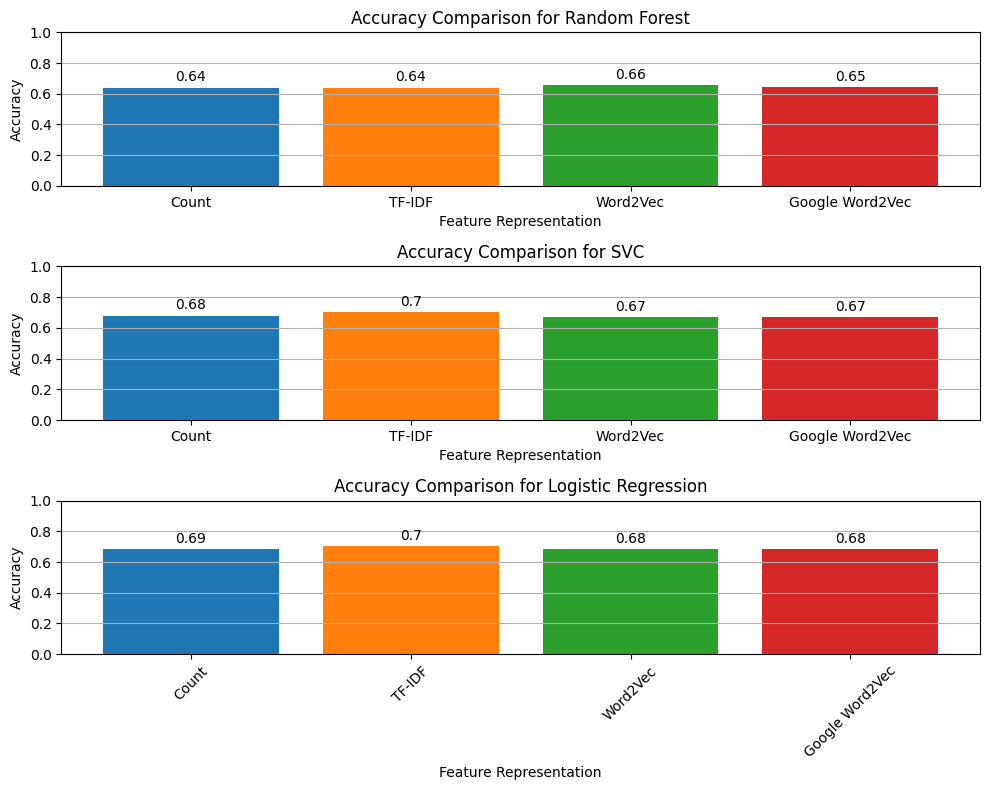

In [51]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'SVC', 'Logistic Regression']
features = ['Count', 'TF-IDF', 'Word2Vec', 'Google Word2Vec']

# Example accuracy values (replace with your accuracy values)
accuracy_values = [
    [accuracy_rf_count, accuracy_rf_tfidf, accuracy_rf_word2vec, accuracy_rf_google_w2v],
    [accuracy_svc_count, accuracy_svc_tfidf, accuracy_svc_word2vec, accuracy_svc_google_w2v],
    [accuracy_lr_count, accuracy_lr_tfidf, accuracy_lr_word2vec, accuracy_lr_google_w2v]
]

num_models = len(models)
num_features = len(features)

# Choose a color palette with distinct and pleasing colors
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, axes = plt.subplots(nrows=num_models, ncols=1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

for idx, ax in enumerate(axes):
    bars = ax.bar(np.arange(num_features), accuracy_values[idx], tick_label=features, color=color_palette)
    ax.set_ylim(0, 1)  # Set y-axis range to 0-1 for accuracy values
    ax.set_xlabel('Feature Representation')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Accuracy Comparison for {models[idx]}')
    ax.grid(axis='y')

    # Add accuracy values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

    # Comment out the legend line to remove it
    # ax.legend(models)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# <code style="background:white;color:#E2522F"> LinePlot:

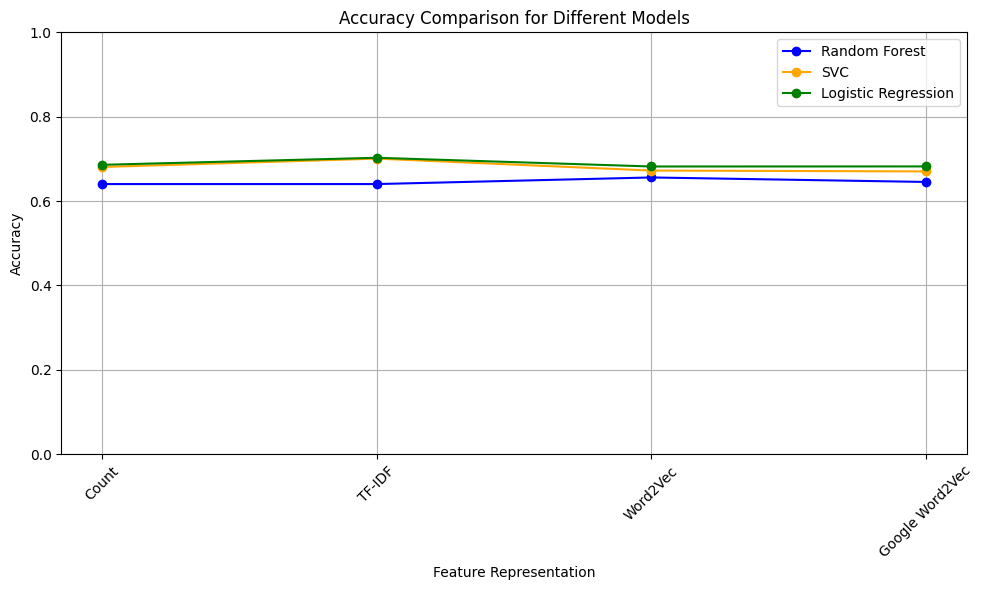

In [53]:
import matplotlib.pyplot as plt

# Example accuracy values (replace with your accuracy values)
accuracy_values_rf = [
    accuracy_rf_count, accuracy_rf_tfidf, accuracy_rf_word2vec, accuracy_rf_google_w2v
]

accuracy_values_svc = [
    accuracy_svc_count, accuracy_svc_tfidf, accuracy_svc_word2vec, accuracy_svc_google_w2v
]

accuracy_values_lr = [
    accuracy_lr_count, accuracy_lr_tfidf, accuracy_lr_word2vec, accuracy_lr_google_w2v
]

fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for Random Forest
ax.plot(features, accuracy_values_rf, marker='o', label='Random Forest', color='blue')

# Line plot for SVC
ax.plot(features, accuracy_values_svc, marker='o', label='SVC', color='orange')

# Line plot for Logistic Regression
ax.plot(features, accuracy_values_lr, marker='o', label='Logistic Regression', color='green')

ax.set_xlabel('Feature Representation')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for Different Models')
ax.set_ylim([0, 1])  # Set y-axis range to 0-1 for accuracy values
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


# <code style="background:white;color:#E2522F"> Overall Analysis:
- <b>All models across different vectorization techniques show a trend of performing well on the majority class and struggling with minority class classification.
- <b>TFIDFVectorizer and Word2Vec seem to yield better results compared to CountVectorizer, likely due to their ability to capture semantic relationships or term importance.

# <code style="background:white;color:#E2522F"> Conclusion:
- <b>Logistic regression was overall better performing model than other two models.Logistic regression was consistently better performing with all vectorizer.
- <b>TF-IDF was one of the best among all vectorizer model.